**UMAP dimensionality reduction technique followed by clustering and a classification feature extraction technique - Heart dataset**

**Exploratory Data Analysis (EDA) - Initial Findings**

In [2]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

# Load the dataset
file_path = 'Heart.csv'
heart_data = pd.read_csv(file_path)

# Displaying the first few rows for an initial understanding of the data
initial_inspection = heart_data.head()

# Getting a summary of the dataset
summary = {
    "Number of Observations": heart_data.shape[0],
    "Number of Features": heart_data.shape[1],
    "Missing Values": heart_data.isnull().sum().sum(),  # Total missing values
    "Data Types": heart_data.dtypes.value_counts().to_dict()  # Counts of different data types
}

initial_inspection, summary

Saving Heart.csv to Heart.csv


(   Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
 0           1   63    1       typical     145   233    1        2    150   
 1           2   67    1  asymptomatic     160   286    0        2    108   
 2           3   67    1  asymptomatic     120   229    0        2    129   
 3           4   37    1    nonanginal     130   250    0        0    187   
 4           5   41    0    nontypical     130   204    0        2    172   
 
    ExAng  Oldpeak  Slope   Ca        Thal  AHD  
 0      0      2.3      3  0.0       fixed   No  
 1      1      1.5      2  3.0      normal  Yes  
 2      1      2.6      2  2.0  reversable  Yes  
 3      0      3.5      3  0.0      normal   No  
 4      0      1.4      1  0.0      normal   No  ,
 {'Number of Observations': 303,
  'Number of Features': 15,
  'Missing Values': 6,
  'Data Types': {dtype('int64'): 10, dtype('O'): 3, dtype('float64'): 2}})

**Exploratory Data Analysis (EDA) - Data Cleaning and Preprocessing**

In [3]:
# Data Cleaning and Preprocessing
# Handling missing values and converting categorical variables into numeric format

# Checking for missing values in detail
missing_values = heart_data.isnull().sum()

# Converting categorical variables to numeric format using one-hot encoding
# Identifying categorical columns
categorical_columns = heart_data.select_dtypes(include=['object']).columns

# Applying one-hot encoding
heart_data_encoded = pd.get_dummies(heart_data, columns=categorical_columns, drop_first=True)

# Checking the transformation
transformed_sample = heart_data_encoded.head()

missing_values, transformed_sample

(Unnamed: 0    0
 Age           0
 Sex           0
 ChestPain     0
 RestBP        0
 Chol          0
 Fbs           0
 RestECG       0
 MaxHR         0
 ExAng         0
 Oldpeak       0
 Slope         0
 Ca            4
 Thal          2
 AHD           0
 dtype: int64,
    Unnamed: 0  Age  Sex  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
 0           1   63    1     145   233    1        2    150      0      2.3   
 1           2   67    1     160   286    0        2    108      1      1.5   
 2           3   67    1     120   229    0        2    129      1      2.6   
 3           4   37    1     130   250    0        0    187      0      3.5   
 4           5   41    0     130   204    0        2    172      0      1.4   
 
    Slope   Ca  ChestPain_nonanginal  ChestPain_nontypical  ChestPain_typical  \
 0      3  0.0                     0                     0                  1   
 1      2  3.0                     0                     0                  0   
 2      2  

**Address Missing Values**

In [4]:
# Addressing missing values
# We will use median imputation as it's robust to outliers for numerical data

# Imputing missing values in 'Ca' and 'Thal' with their respective medians
for column in ['Ca', 'Thal_normal', 'Thal_reversable']:
    median_value = heart_data_encoded[column].median()
    heart_data_encoded[column].fillna(median_value, inplace=True)

# Checking if all missing values are addressed
missing_values_after_imputation = heart_data_encoded.isnull().sum()

missing_values_after_imputation

Unnamed: 0              0
Age                     0
Sex                     0
RestBP                  0
Chol                    0
Fbs                     0
RestECG                 0
MaxHR                   0
ExAng                   0
Oldpeak                 0
Slope                   0
Ca                      0
ChestPain_nonanginal    0
ChestPain_nontypical    0
ChestPain_typical       0
Thal_normal             0
Thal_reversable         0
AHD_Yes                 0
dtype: int64

**Computing descriptive statistics for the dataset**

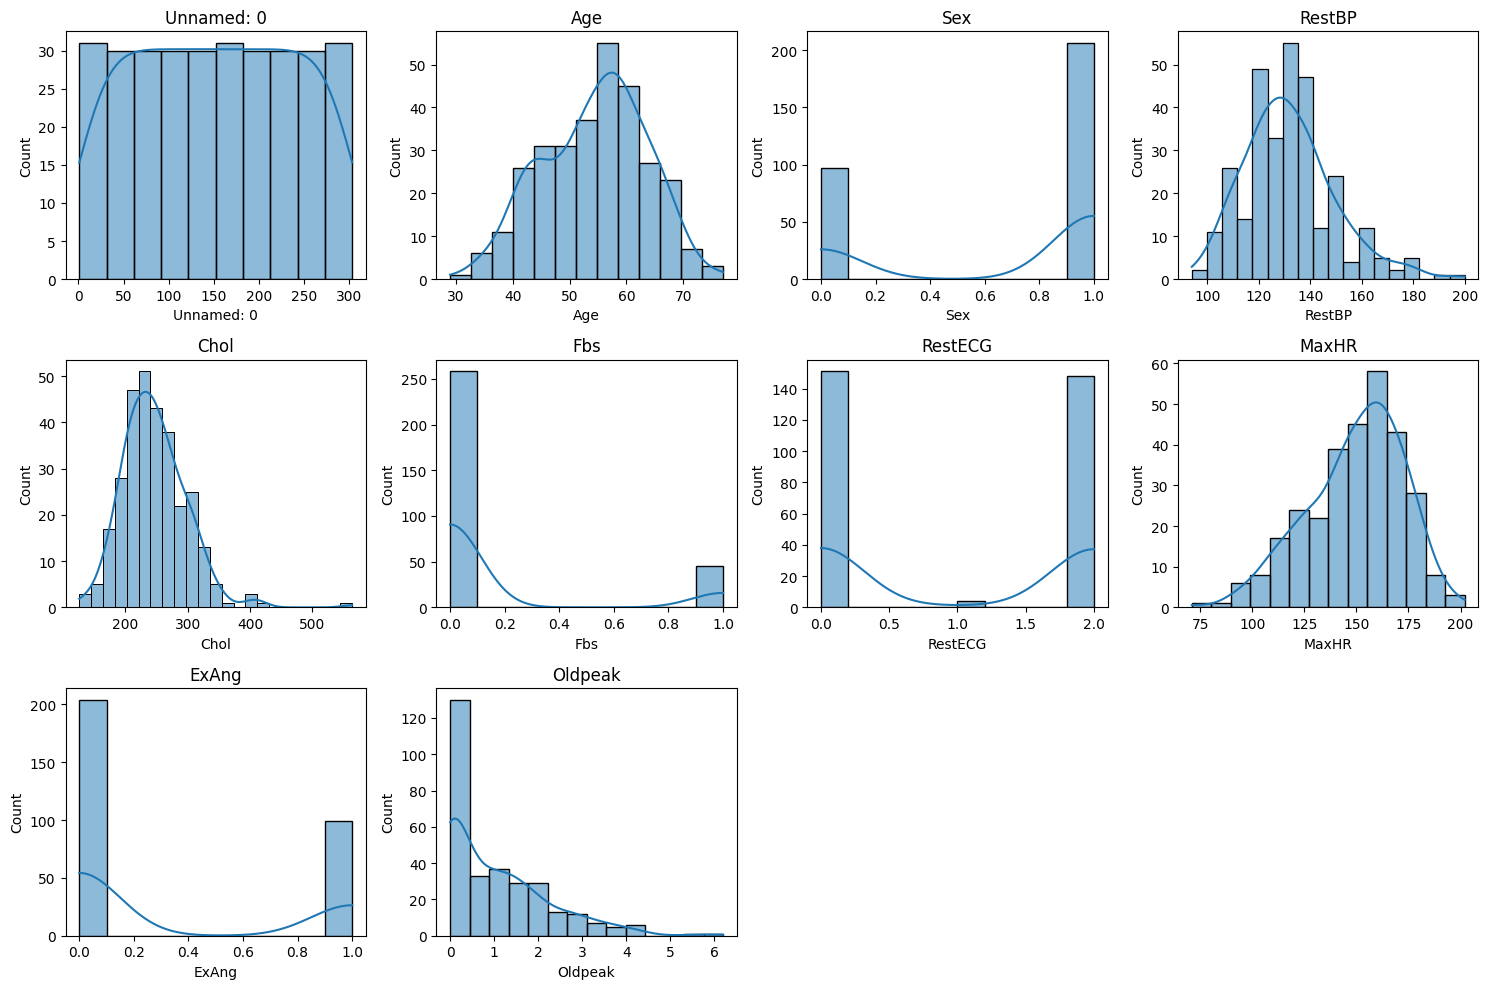

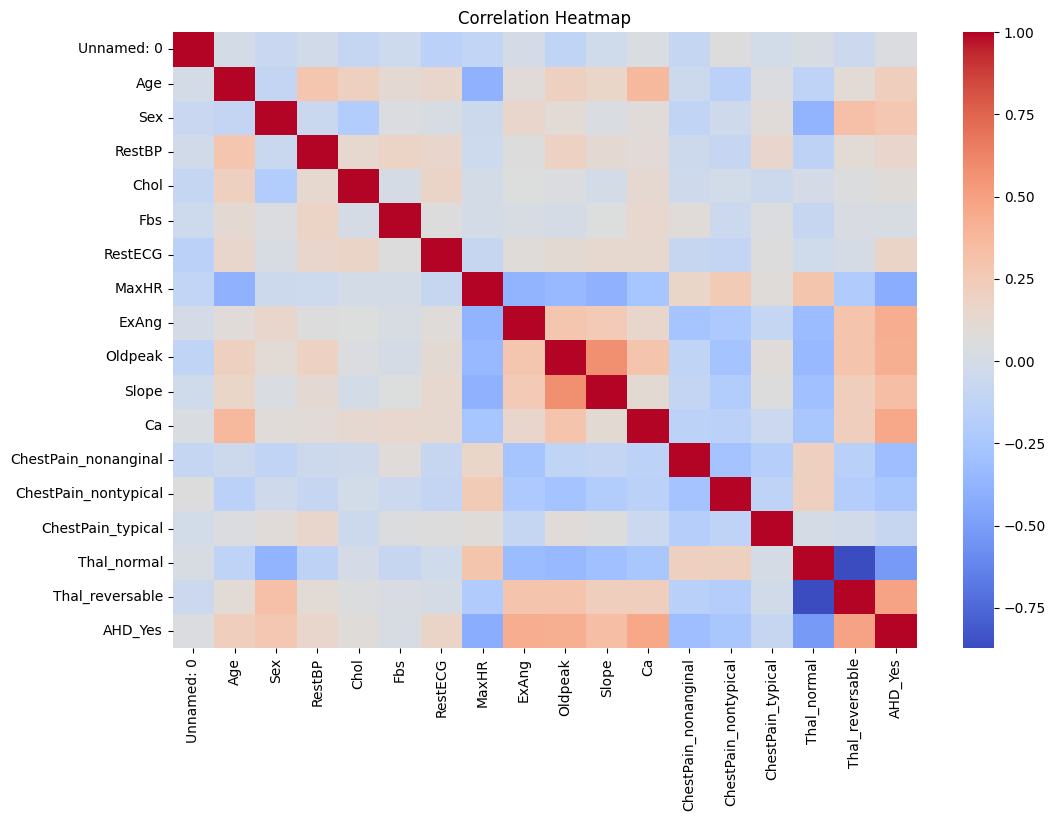

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable,AHD_Yes
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,0.283828,0.165017,0.075908,0.547855,0.386139,0.458746
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.451600,0.371809,0.265288,0.498528,0.487668,0.499120
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Statistics
descriptive_stats = heart_data_encoded.describe()

# Visualization of key variables using histograms
plt.figure(figsize=(15, 10))
for i, column in enumerate(heart_data_encoded.columns[:10], 1):  # Visualizing first 10 columns
    plt.subplot(3, 4, i)
    sns.histplot(heart_data_encoded[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heart_data_encoded.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

descriptive_stats

**Applying UMAP with Heart Dataset**

In [7]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.8 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86831 sha256=06952f85192279e2418d0f68bcbf0ffb1190744dc49babc62f42412df90a21e4
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


**Dimensionality Reduction using UMAP**

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


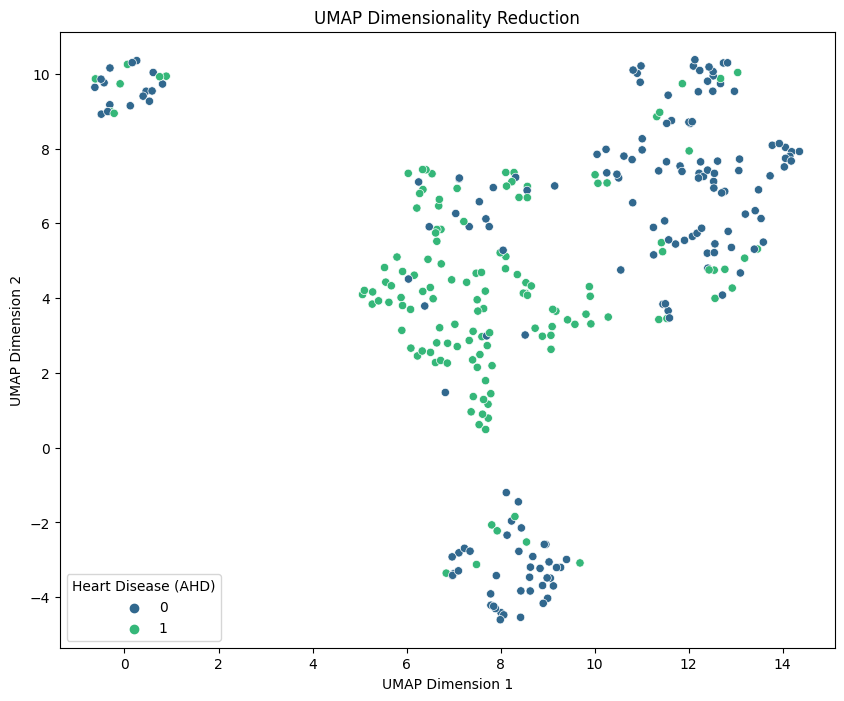

(303, 2)

In [8]:
from sklearn.preprocessing import StandardScaler
from umap import UMAP
import numpy as np

# Data Preparation
# Excluding the target variable 'AHD_Yes' for UMAP
X = heart_data_encoded.drop(['AHD_Yes'], axis=1)
y = heart_data_encoded['AHD_Yes']

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying UMAP
# Configuring UMAP parameters
umap = UMAP(n_neighbors=5, min_dist=0.3, n_components=2, random_state=42)

# Fitting UMAP on the data
X_umap = umap.fit_transform(X_scaled)

# Preparing data for visualization
umap_df = pd.DataFrame(data = X_umap, columns = ['UMAP1', 'UMAP2'])
umap_df['Target'] = y

# Visualizing the UMAP reduced data
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Target', data=umap_df, palette='viridis')
plt.title('UMAP Dimensionality Reduction')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Heart Disease (AHD)')
plt.show()

X_umap.shape  # Shape of the reduced data

**Clustering with HDBSCAN**

In [10]:
pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 13.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039187 sha256=b28d1cbe0ecfc7ea0157bbd1831a5fd10a09cade5daeb9ecb23f5dec184aba63
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.5
    Uninstalling Cython-3.0.5:
      Successfully uninstalled Cython-3.0.5


**Apply HDBSCAN Clustering**

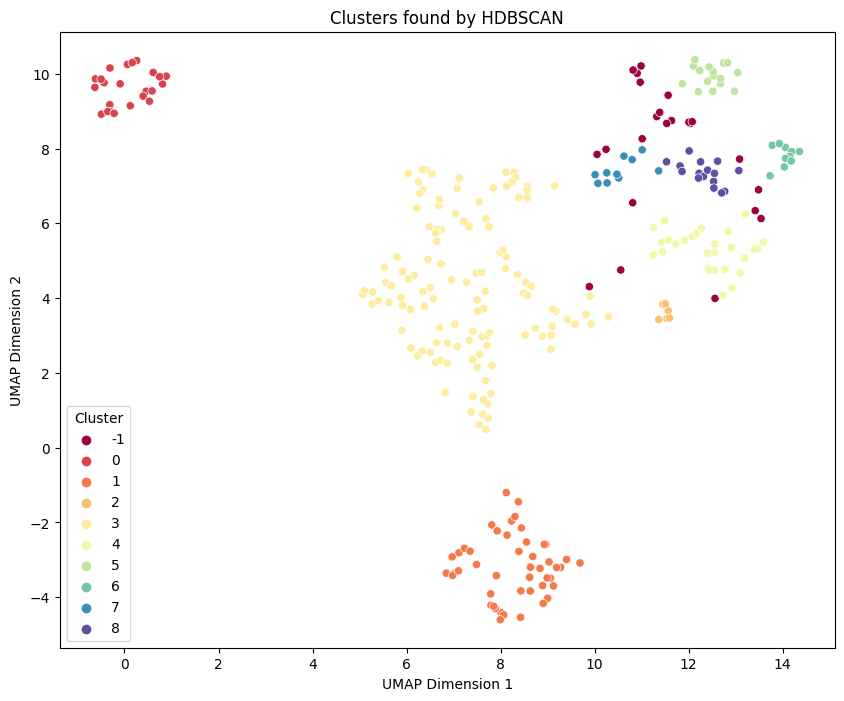

In [11]:
import hdbscan

# Applying HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)

# Fitting the clusterer to the UMAP reduced data
cluster_labels = clusterer.fit_predict(X_umap)

# Adding cluster labels to the UMAP dataframe
umap_df['Cluster'] = cluster_labels

# Visualizing the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Cluster', data=umap_df, palette='Spectral', legend="full")
plt.title('Clusters found by HDBSCAN')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Cluster')
plt.show()

**Classification Feature Extraction**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Prepare the data with the cluster labels as additional features
X_with_clusters = heart_data_encoded.drop(['AHD_Yes'], axis=1)
X_with_clusters['Cluster_Labels'] = cluster_labels

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_with_clusters, y, test_size=0.3, random_state=42)

# Initialize the classifier
classifier = LogisticRegression()

# Train the model
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8681318681318682
Confusion Matrix:
[[41  7]
 [ 5 38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        48
           1       0.84      0.88      0.86        43

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Visualizing the Classification Results**

**Confusion Matrix**

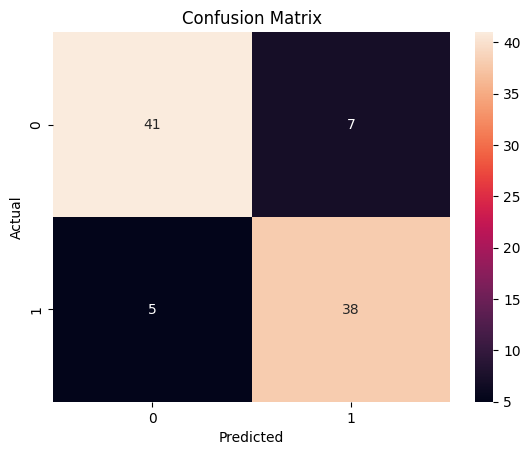

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined as your true labels and predictions
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

**ROC Curve**

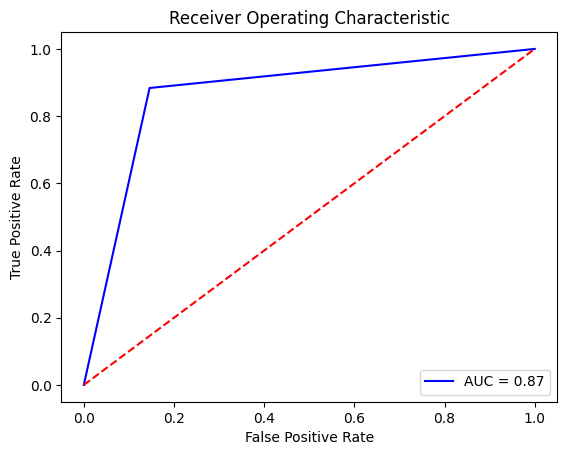

In [14]:
from sklearn.metrics import roc_curve, auc

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

**Classification Report**

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        48
           1       0.84      0.88      0.86        43

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



<Axes: >

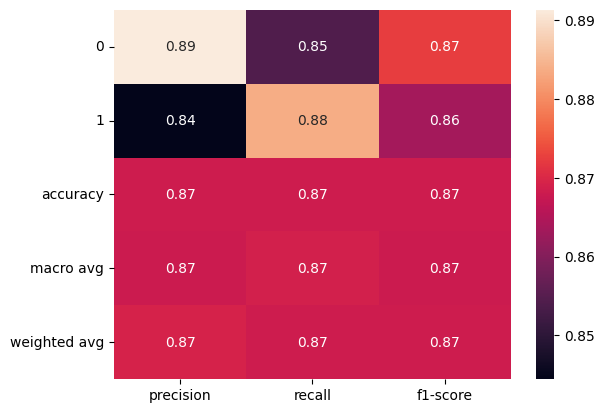

In [15]:
from sklearn.metrics import classification_report
import seaborn as sns
import numpy as np

# Print the text report
print(classification_report(y_test, y_pred))

# To visualize as a heatmap
report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)